In [28]:
# import packages and data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


strokes = pd.read_csv('./stroke-data.csv')

In [29]:
strokes.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [30]:
strokes.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [31]:
strokes.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [32]:
strokes.drop(['id'], axis=1, inplace=True)

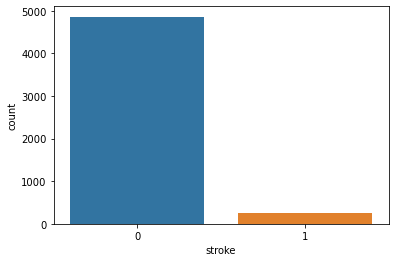

In [33]:
strokes_plot = sns.countplot(x='stroke', data=strokes)


In [34]:
strokes['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

many fewer strokes than non-strokes. Upsample strokes in follow-up analysis

In [35]:
# check if missing bmi is random

bmi_check = pd.concat([strokes['bmi'], strokes['stroke']], axis=1)

bmi_check.head()

,bmi,stroke
0,36.6,1
1,NaN,1
2,32.5,1
3,34.4,1
4,24.0,1


In [36]:
bmi_check.groupby(bmi_check['bmi'].isnull()).mean()

,bmi,stroke
bmi,,
False,28.893237,0.042575
True,NaN,0.199005


- bmi.isnull() returns False 29% of the time, and of those, there's a 4% stroke rate
- bmi.isnull() returns True 71% of the time, and of those, there's a 20% stroke rate
- Thus, the absence of bmi.isnull may be predictive of a stroke

In [37]:
# create 'has_bmi' feature 

strokes['has_bmi'] = bmi_check['bmi'].where(bmi_check['bmi'].isnull(), 1)
strokes.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,has_bmi
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1.0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,NaN
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1.0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1.0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1.0


In [38]:
# fill 'has_bmi' NaNs

strokes['has_bmi'].fillna(0, inplace=True)
strokes.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,has_bmi
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1.0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0.0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1.0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1.0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1.0
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1.0
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,1.0
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,1.0
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1,0.0
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,1.0


In [39]:
strokes['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [40]:
def plot_cont_features(dataset, features):
    for i in features:
        stroke = list(dataset[dataset['stroke'] == 1][i])
        non_stroke = list(dataset[dataset['stroke'] == 0][i])
        xmin = min(min(stroke), min(non_stroke))
        xmax = max((max(stroke), max(non_stroke), (max(stroke)+1)))
        width = (xmax - xmin) / 40
        sns.histplot(stroke, color='r', kde=False, bins=np.arange(xmin, xmax, width))
        sns.histplot(non_stroke, color='b', kde=False, bins=np.arange(xmin, xmax, width))
        plt.legend(['stroke', 'non-stroke'])
        plt.title('Overlaid histogram for {}'.format(i))
        plt.show()
        

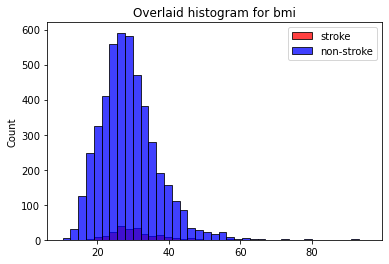

In [41]:
plot_cont_features(strokes, ['bmi'])

Appears that BMI distributions are similar between stroke and non-stroke. therefore normalise bmis to median value


In [42]:
strokes['bmi'].fillna(strokes['bmi'].median(), inplace=True)
strokes.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,has_bmi
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1.0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,0.0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1.0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1.0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1.0


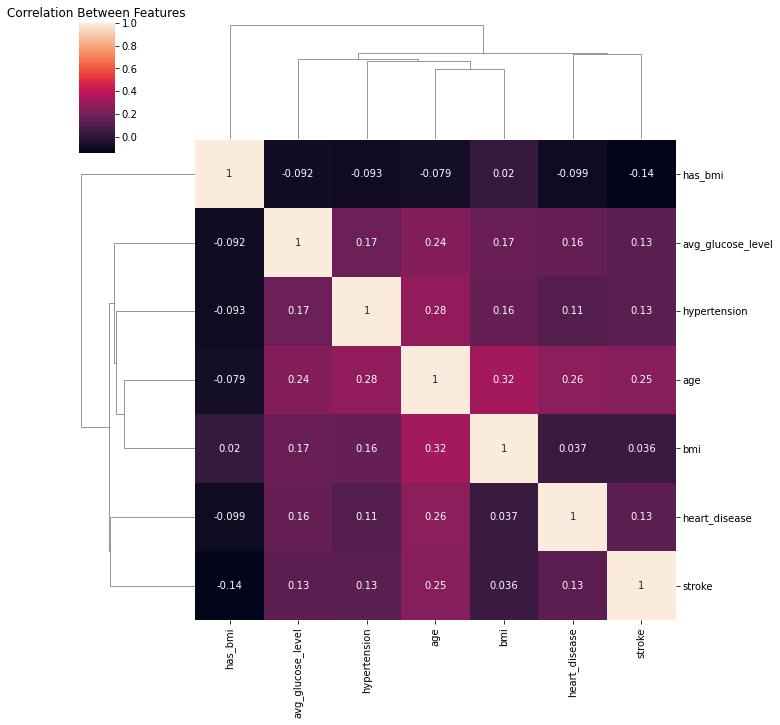

In [43]:
# generate correlation matrix

corr_mat = strokes.corr()

sns.clustermap(corr_mat, annot = True)
plt.title("Correlation Between Features")

plt.show()

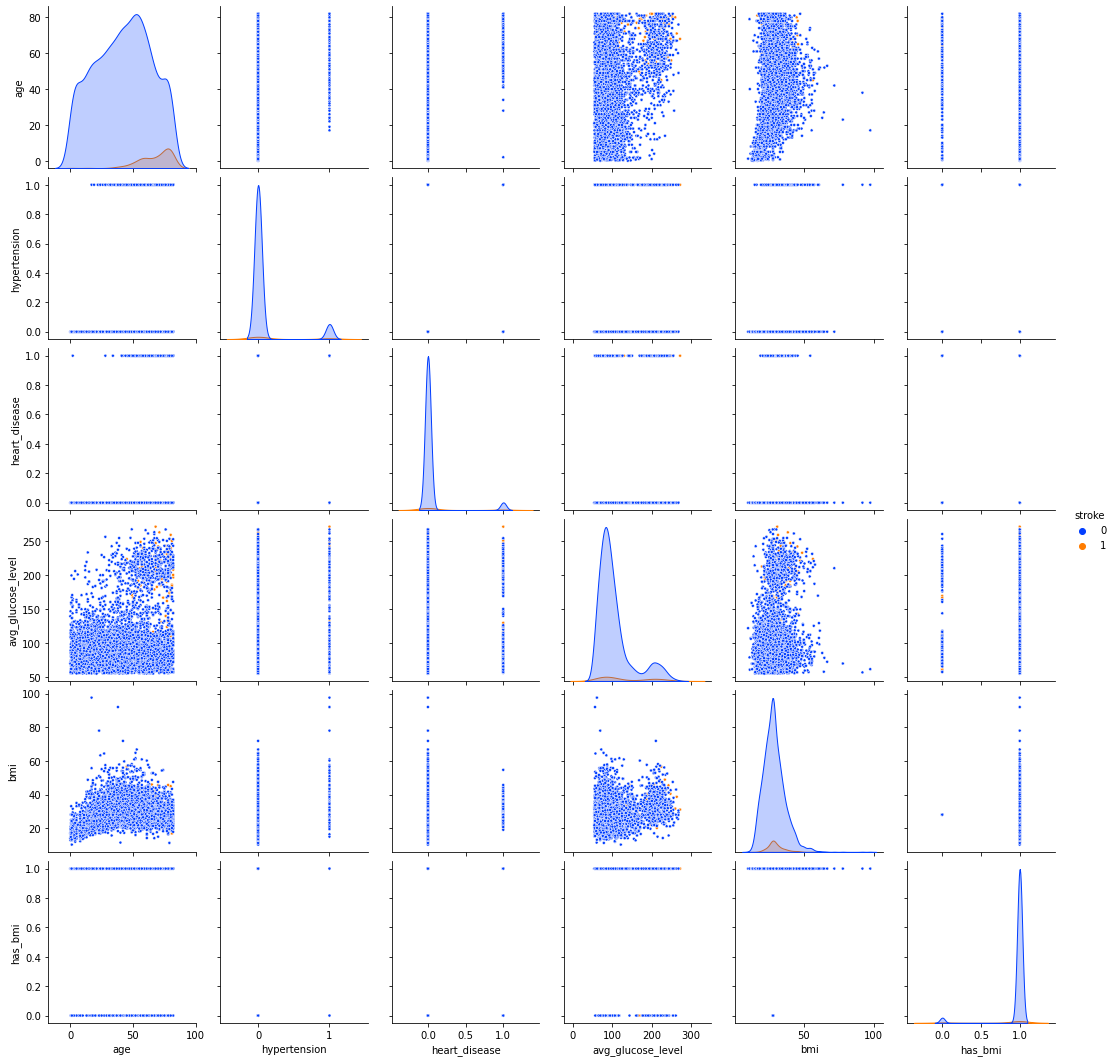

In [44]:
# generate pairplot

# pair plots
threshold = -0.9

 

filt = np.abs(corr_mat["stroke"]) > threshold
corr_feat = corr_mat.columns[filt].tolist()

sns.pairplot(strokes[corr_feat], diag_kind = "kde", markers = '.', hue = "stroke", palette='bright')


plt.show()

In [45]:
strokes['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

Data is very noisy; upsample.

In [46]:
# convert str dtypes to int

gend = {'Male': 0, 'Female': 1, 'Other': 2}
married = {'No': 0, 'Yes': 1}
res = {'Urban': 0, 'Rural': 1}
smoke = {'never smoked': 0, 'formerly smoked': 1, 'smokes': 2, 'Unknown': 3}
work = {'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4}
convert_cols = ['gender', 'ever_married', 'Residence_type', 'smoking_status', 'work_type']
convert_list = [gend, married, res, smoke, work]

for i,j in zip(convert_cols, convert_list):
    strokes[i] = strokes[i].map(j)

    
strokes.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,has_bmi
0,0,67.0,0,1,1,0,0,228.69,36.6,1,1,1.0
1,1,61.0,0,0,1,1,1,202.21,28.1,0,1,0.0
2,0,80.0,0,1,1,0,1,105.92,32.5,0,1,1.0
3,1,49.0,0,0,1,0,0,171.23,34.4,2,1,1.0
4,1,79.0,1,0,1,1,1,174.12,24.0,0,1,1.0


In [47]:
strokes.isnull().sum()


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
has_bmi              0
dtype: int64

In [64]:
# oversample

from imblearn.over_sampling import (SMOTE,
                                    ADASYN)

features = strokes.drop(['stroke'], axis=1)
labels = strokes['stroke']

# SMOTESampler
sampler = SMOTE()
ups_feat, ups_lab = sampler.fit_resample(features, labels.ravel())

print(f'feat shape = {features.shape}')
print(f'ups_feat shape = {ups_feat.shape}')
print(f'lab shape = {labels.shape}')
print(f'ups_lab shape = {ups_lab.shape}')

feat shape = (5110, 11)
ups_feat shape = (9722, 11)
lab shape = (5110,)
ups_lab shape = (9722,)


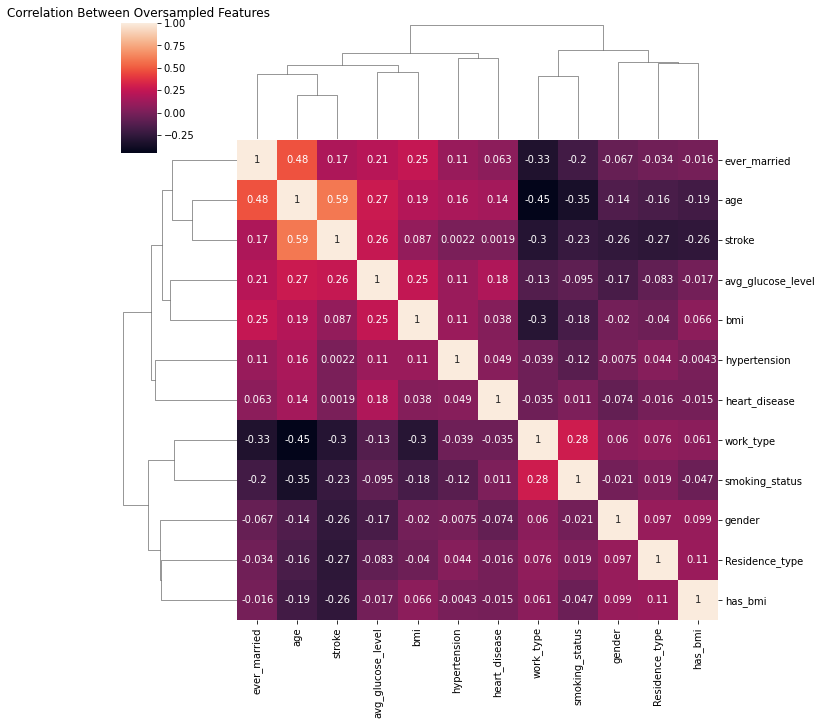

In [69]:
ups_corr_mat = ups_data.corr()

sns.clustermap(ups_corr_mat, annot = True)

plt.title("Correlation Between Oversampled Features")

plt.show()

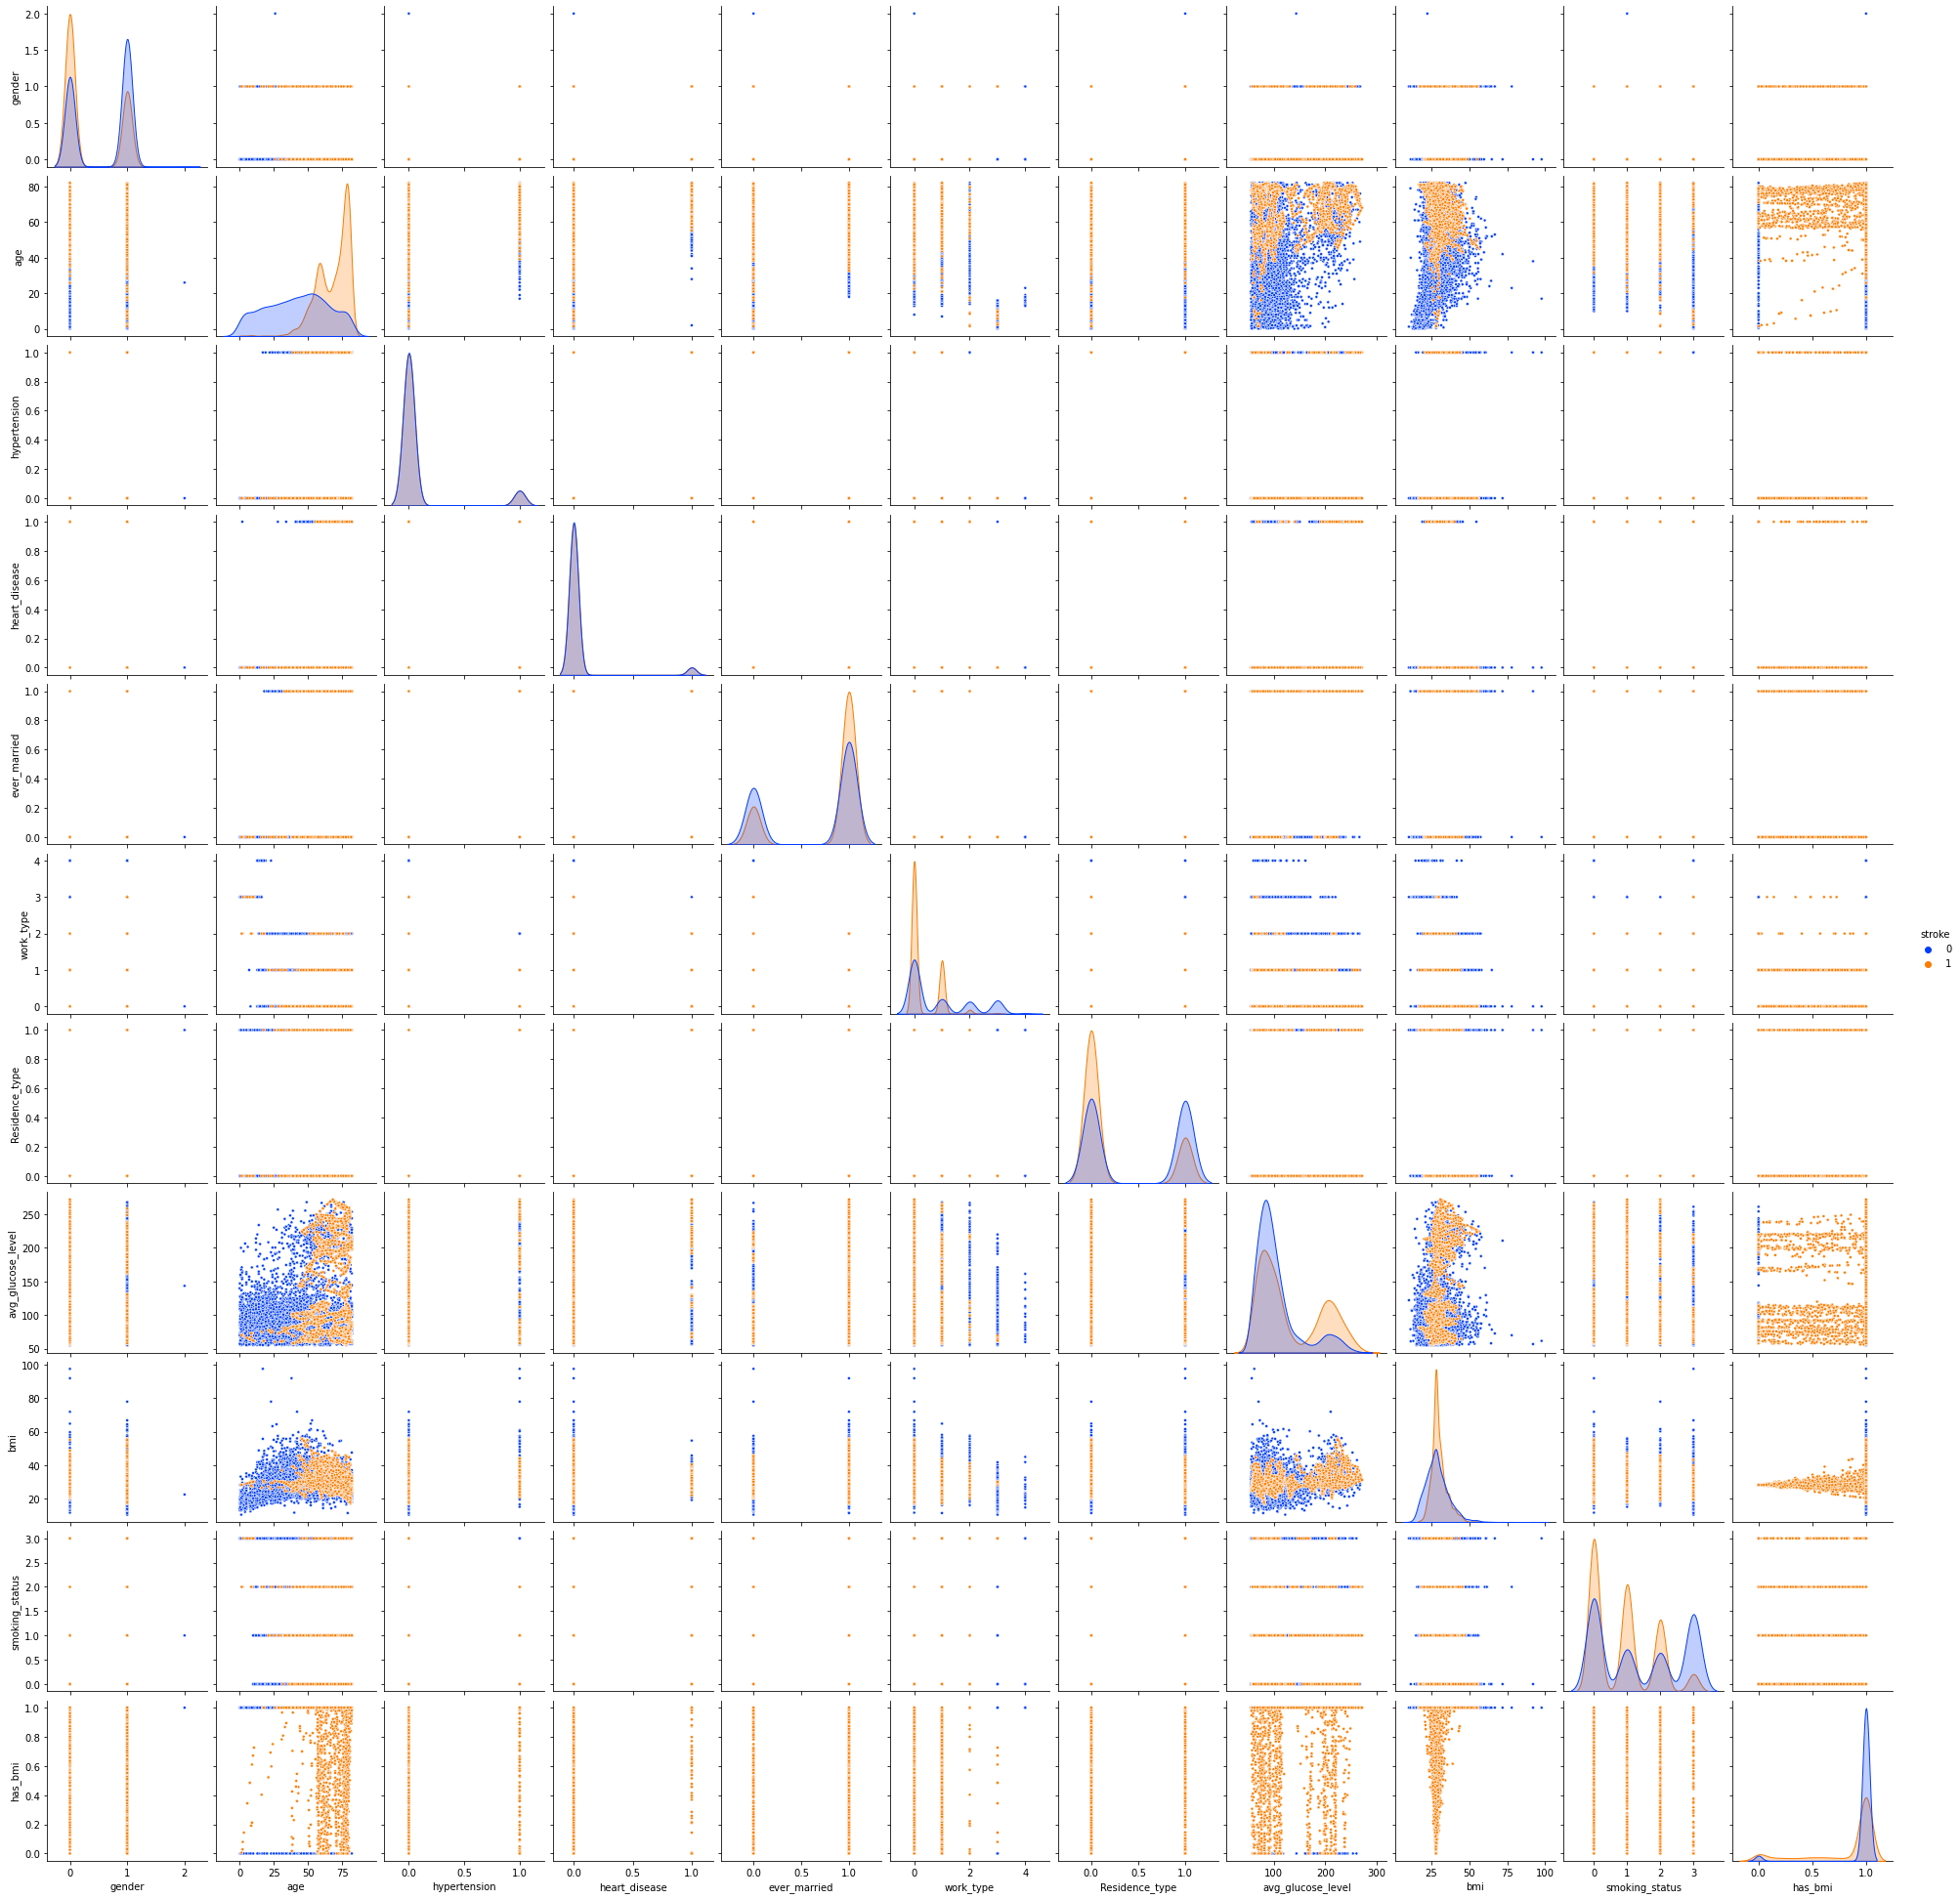

In [66]:
# pair plots
ups_lab_df = pd.DataFrame(ups_lab, columns=['stroke'])

ups_data = pd.concat([ups_feat, ups_lab_df], axis=1)

ups_corr_mat = ups_data.corr()

ups_corr_feat = ups_corr_mat.columns.tolist()

sns.pairplot(ups_data[ups_corr_feat], diag_kind = "kde", markers = '.', hue = "stroke", palette='bright')


plt.show()

[86.50885625030821, 12.311191687202907, 1.105123099994803, 0.031336160941557514, 0.017085621276680892, 0.0077534836829400095, 0.005976508237198501, 0.004345201650425572, 0.003309919173185417, 0.0011578700172913698, 0.0020991844729353923, 0.0017650130418296055]


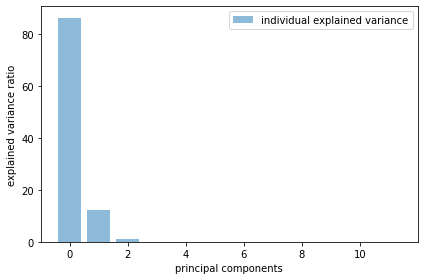

In [70]:
# perform PCA on remaining features


norm_ups_data = ups_data - ups_data.mean()

cov_mat = norm_ups_data.cov()

eig_vals, eig_vects = np.linalg.eig(cov_mat)

e_indices = np.argsort(eig_vals)[::-1]

eig_vects_sorted = eig_vects[:,e_indices]

expl_var = []

for i in eig_vals:
    expl_var.append((i/sum(eig_vals))*100)

print(expl_var)

    
plt.bar(range(len(expl_var)), expl_var, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('explained variance ratio')
plt.xlabel('principal components')
plt.legend()
plt.tight_layout()

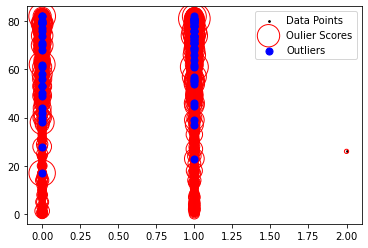

In [73]:
# outlier detection
from sklearn.neighbors import LocalOutlierFactor


y = ups_data['stroke']
x = ups_data.drop(['stroke'], axis = 1)

clf = LocalOutlierFactor(n_neighbors = 20)
clf.fit_predict(x)
xScore = clf.negative_outlier_factor_

outlierScore = pd.DataFrame()
outlierScore["score"] = xScore

threshold = -2
filt = outlierScore["score"] < threshold
outlierIndex = outlierScore[filt].index.tolist()

radius = (xScore.max() - xScore) / (xScore.max() - xScore.min())
outlierScore["radius"] = radius

plt.scatter(x.iloc[:, 0], x.iloc[:, 1], color = 'k', s = 3, label = "Data Points")
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], s = 1000 * radius, edgecolors = 'r', facecolors = "none", label = "Oulier Scores")
plt.scatter(x.iloc[outlierIndex, 0], x.iloc[outlierIndex, 1], color = 'b', s = 50, label = "Outliers")
plt.legend()

plt.show()

In [74]:
def detect_outliers(dataset, feature):
    outliers = []
    data = dataset[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len([i for i in data
                                                                if i > data.quantile(.99)])))
       

In [75]:
features = ups_data.drop('stroke', axis=1)
columns = list(features.columns)

for i in columns:
    detect_outliers(ups_data, i)


Outlier caps for gender:
  --95p: 1.0 / 1 values exceed that
  --3sd: 2.0 / 1 values exceed that
  --99p: 1.0 / 1 values exceed that

Outlier caps for age:
  --95p: 80.2 / 487 values exceed that
  --3sd: 121.2 / 0 values exceed that
  --99p: 81.7 / 98 values exceed that

Outlier caps for hypertension:
  --95p: 1.0 / 0 values exceed that
  --3sd: 0.9 / 870 values exceed that
  --99p: 1.0 / 0 values exceed that

Outlier caps for heart_disease:
  --95p: 0.0 / 462 values exceed that
  --3sd: 0.7 / 462 values exceed that
  --99p: 1.0 / 0 values exceed that

Outlier caps for ever_married:
  --95p: 1.0 / 0 values exceed that
  --3sd: 2.1 / 0 values exceed that
  --99p: 1.0 / 0 values exceed that

Outlier caps for work_type:
  --95p: 3.0 / 22 values exceed that
  --3sd: 3.3 / 22 values exceed that
  --99p: 3.0 / 22 values exceed that

Outlier caps for Residence_type:
  --95p: 1.0 / 0 values exceed that
  --3sd: 1.8 / 0 values exceed that
  --99p: 1.0 / 0 values exceed that

Outlier caps for a

In [76]:
# normalise data
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

min_max = scaler.fit_transform(features)

features_minmax = pd.DataFrame(min_max, columns=features.columns)

features_minmax.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,has_bmi
0,0.0,0.816895,0.0,1.0,1.0,0.00,0.0,0.801265,0.301260,0.333333,1.0
1,0.5,0.743652,0.0,0.0,1.0,0.25,1.0,0.679023,0.203895,0.000000,0.0
2,0.0,0.975586,0.0,1.0,1.0,0.00,1.0,0.234512,0.254296,0.000000,1.0
3,0.5,0.597168,0.0,0.0,1.0,0.00,0.0,0.536008,0.276060,0.666667,1.0
4,0.5,0.963379,1.0,0.0,1.0,0.25,1.0,0.549349,0.156930,0.000000,1.0


In [81]:
from sklearn.model_selection import train_test_split

features = features_minmax
labels = pd.DataFrame(ups_data, columns=['stroke'])

x_train, x_test, y_train, y_test = train_test_split(features, labels, random_state=42, test_size=0.4) # training set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, random_state=42, test_size=0.5) # splits remaining into val and test

In [82]:
# export datasets
ups_data.to_csv('./ups_data.csv', index=False)


x_train.to_csv('./x_train_features4.csv', header=None, index=False)
x_val.to_csv('./x_val_features4.csv', header=None, index=False)    
x_test.to_csv('./x_test_features4.csv', header=None, index=False)

y_train.to_csv('./y_train_labels4.csv', header=None, index=False)
y_val.to_csv('./y_val_labels4.csv', header=None, index=False)
y_test.to_csv('./y_test_labels4.csv', header=None, index=False)